In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import spearmanr, pearsonr, theilslopes, kendalltau

from lnc_analysis import*

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data_dir = '/Users/maoyabassiouni/Documents/DATA/Projects/OLNI'

# Data

In [5]:
data_f = os.path.join(data_dir ,'model_inputs', 'df_model_all_annual.csv')
df_ts_ = open_lnc_data(data_f, filter_lnc=False)

In [6]:
common_mean = 18

# Trends & models

### ICP Observed Trends



In [7]:
df_ts_ = standardize_to_common_mean('LNC', df_ts_, common_mean=common_mean)

In [8]:
trend_result_all = trend_summary_df('LNC_stdm', df_ts_)

### LTavg climate

In [9]:
clim_n = ['TC_tmean_gs_LTavg', 'TC_vpd_gs_LTavg', ]
lt_clim = []

for ii, tti in trend_result_all.iterrows():
    dsix = df_ts_[(df_ts_['Lat']==tti['Lat']) 
                 & (df_ts_['Lon']==tti['Lon'])
                 & (df_ts_['sp']==tti['sp'])]
    lt_clim.append([np.mean(dsix[kk]) for kk in clim_n])
lt_clim = zip(*lt_clim)
for vv, kk in zip(lt_clim, clim_n):
    trend_result_all[kk]=vv

### Calculate P-model 

In [10]:
clim_v = 'gs_LTavg'
co2_v = 'CO2_yi'
stressB = 1
model_tag ='sunlit_ww'
variant = [model_tag, clim_v, co2_v, stressB]

trend_result_all, df_ts_ = add_p_model(df_ts_, trend_result_all, variant, common_mean)

# Fig 3 - Theoretical trajectories

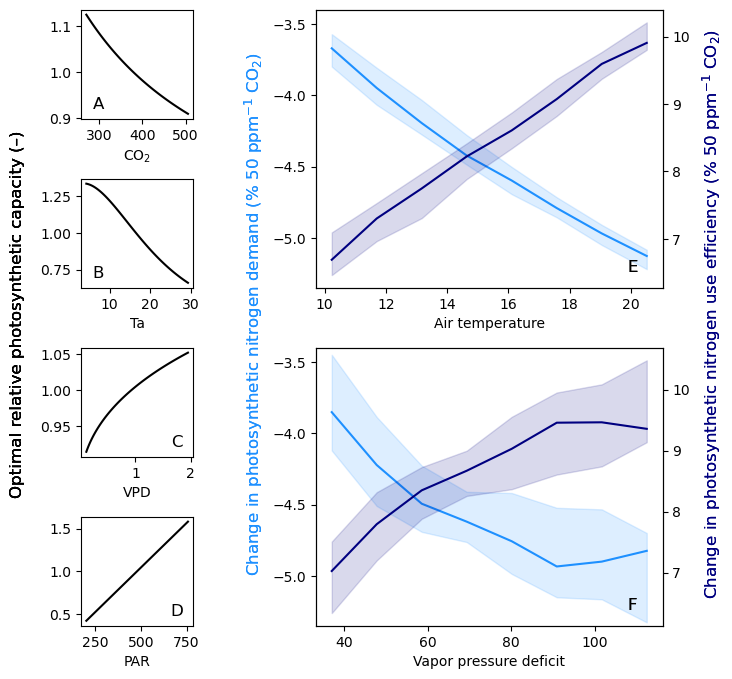

In [13]:
trend_name = 'deltaC vcmax25_gs_LTavg_sunlit_ww_stdm'

trend_result_all_f = trend_result_all[np.isnan(trend_result_all[trend_name])==0]

fig_3_theory(trend_result_all_f, df_ts_, trend_name, figname='../figs/fig_3_theory.pdf')